In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [68]:
fish_data=pd.read_csv('/Users/surajchoudhary/Documents/Kaggel/fish.csv')

In [69]:
fish_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [70]:
# Checking Missing values in data
fish_data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

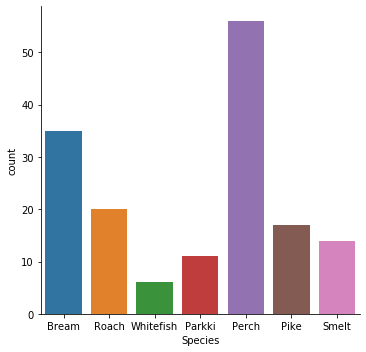

In [71]:
#ploting the count for each species
sns.catplot('Species',kind='count',data=fish_data)

In [72]:
#Finding co-relation
fish_data.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


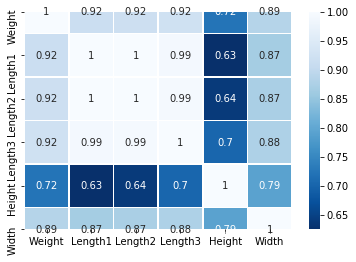

In [73]:
sns.heatmap(fish_data.corr(),annot=True,cmap='Blues_r',linewidths=.5)

In [81]:
#Assigning dummy values for categorical columns
fish_data = pd.get_dummies(fish_data, columns=["Species"],drop_first=True)

In [82]:
X = fish_data.drop(['Weight'], axis=1) #Train on these columns
y = fish_data["Weight"] #Predict this column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [83]:
# split dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [84]:
# fit linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

print("Coefficients: ",regressor.intercept_, regressor.coef_)

Coefficients:  -637.4064075010148 [ 37.55666542  19.51285217  61.27829119 -56.49446698  48.09922507
   7.60615791]


In [85]:
# predict
predict_val = regressor.predict(x_test)

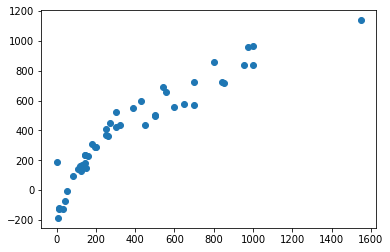

In [88]:
plt.scatter(y_test,predict_val)

In [89]:
from sklearn import metrics
print("MEA: " ,metrics.mean_absolute_error(y_test,predict_val))
print("MSE: " ,metrics.mean_squared_error(y_test,predict_val))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,predict_val)))

MEA:  97.56153014653273
MSE:  15155.167345053449
RMSE:  123.10632536573192


In [91]:
#Calculting R-Sqared values
def rSquared(observed, predicted):
    error = ((predicted - observed)**2).sum()
    meanError = error/len(observed)
    return 1 - (meanError/np.var(observed))

print(rSquared(y_test,predict_val))

0.8717736190375853
